# Analyzing CrUX (Chrome User Experience Report)
Data is extracted using [Google BigQuery](https://bigquery.cloud.google.com/table/chrome-ux-report:all.201808?tab=preview). 
Additional info: 
* [Chrome UX Report documentation](https://developers.google.com/web/tools/chrome-user-experience-report/)
* [Google Developers: How to setup a custom CrUX report dashboard](https://developers.google.com/web/updates/2018/08/chrome-ux-report-dashboard)
* [Tutorial: Using BigQuery to Analyze Chrome User Experience Report Data](https://paulcalvano.com/index.php/2018/05/06/tutorial-using-bigquery-to-analyze-chrome-user-experience-report-data/)

## onload metric
> “The load event is fired when the page and its dependent resources have finished loading.”
>
> – [MDN](https://developer.mozilla.org/en-US/docs/Web/Events/load)

In [34]:
import pandas as pd

# read csv data into dataframe
df = pd.read_csv('../data/crux-politiska-partier-onload-2018-08.csv', sep=',')

# show some of the dataframe
df.sort_values('volume', ascending=False)

,origin,client,metric,bin,volume
9471,https://www.vansterpartiet.se,phone,onload,0.6,0.040400
9470,https://www.vansterpartiet.se,phone,onload,0.7,0.040400
2145,https://www.mp.se,desktop,onload,0.9,0.037550
2146,https://www.mp.se,desktop,onload,0.8,0.037550
5327,https://www.liberalerna.se,phone,onload,0.2,0.037100
5328,https://www.liberalerna.se,phone,onload,0.3,0.037100
2132,https://www.mp.se,desktop,onload,0.6,0.036750
2133,https://www.mp.se,desktop,onload,0.7,0.036750
10525,https://www.vansterpartiet.se,desktop,onload,0.7,0.036300
10526,https://www.vansterpartiet.se,desktop,onload,0.6,0.036300


In [41]:
# should be a number somewhat matching the number of unique websites below
onload = df['volume']
onload.sum()

9.9967

## Unique websites

In [39]:
df['origin'].unique()

array(['https://sd.se', 'https://www.mp.se', 'https://moderaterna.se',
       'https://www.liberalerna.se', 'https://www.piratpartiet.se',
       'https://kristdemokraterna.se', 'https://www.centerpartiet.se',
       'https://www.vansterpartiet.se',
       'https://feministisktinitiativ.se',
       'https://www.socialdemokraterna.se'], dtype=object)

## Visualising the result

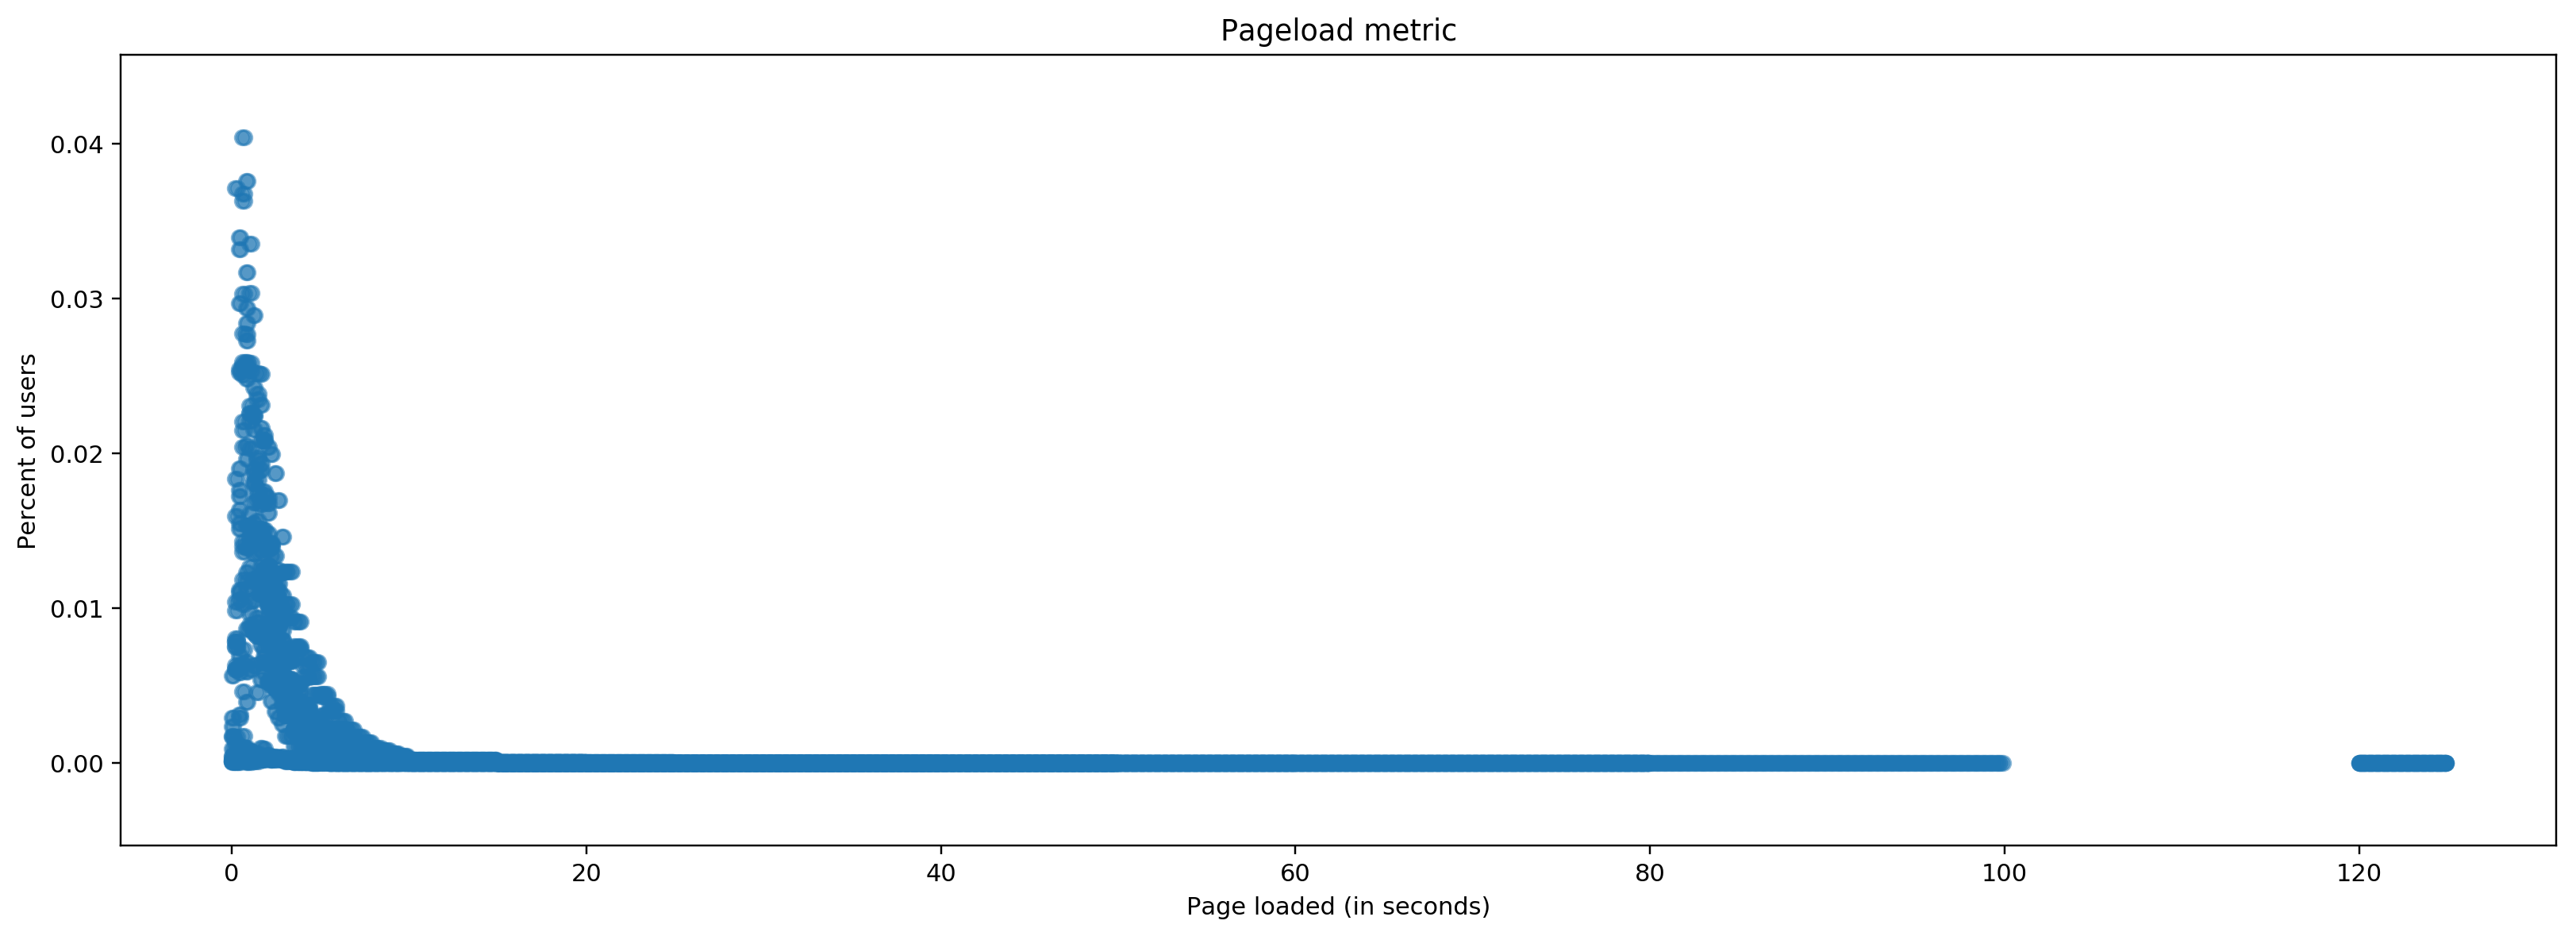

In [107]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=220, facecolor='w', edgecolor='k')

plt.scatter(df['bin'], df['volume'], alpha=0.5)
plt.title('Pageload metric')
plt.xlabel('Page loaded (in seconds)')
plt.ylabel('Percent of users')
plt.show()